# 3. Интерполирование с помощью кубического сплайна

Рассмотрим сетку $\{x_i\}_{i=0}^n, x_i \in [a,b]$ i = 1, ..., n
$$a = x_0 < ... < x_{n-1} < x_n = b$$
Построим разбиение $\Delta = \{\Delta_i\}$, $\Delta_i = [x_{i-1}, x_i]$


Для $m \geq 0$ и разбиения $\Delta$ рассмотрим функцию s, определенную на [a,b] и обладающую следующими свойствами:
- $s(x)\vert_{x \in \Delta_i} = s_i(x), s_i \in \mathbb{P}_m$ 
- $s \in C^{m-1}[a,b]$ 

Такая функция s называется __полиномиальным сплайном__ порядка m. Множество таких сплайнов обозначим $S_{\Delta}^m$

Сплайн s будем называть __интерполяционным__ для функции f, если
$$s(x_i) = f(x_i) = y_i,\ \forall i = \overline{1,n}$$ 

Понятно, что интерполяционный сплайн $𝑠 \in 𝑆_{\Delta}^1$ представляет собой кусочно-линейную функцию (график — ломаная линия), построенную по точкам $\{(𝑥𝑖 , 𝑦𝑖 )\}^𝑛_{𝑖=0}=0$ . Больший интерес, конечно, представляют сплайны высших степеней. 

Наиболее распростренёнными являются кубические интерполяционные сплайны.

Будем вычислять интерполический сплайн 3-го порядка в виде:
$$𝑠_𝑖(𝑥) = \alpha_𝑖 + \beta_𝑖 (𝑥 − 𝑥_𝑖) +\frac{\gamma_𝑖}{2}(𝑥 − 𝑥_𝑖)^2 + \frac{\delta_𝑖}{6}(𝑥 − 𝑥_𝑖 )^3$$
$$𝑥 \in \Delta_i = [𝑥_{𝑖−1}, 𝑥_𝑖 ]$$

Для вычисления коэффициентов сплайна используем формулы:
$$\alpha_i = 𝑦_i \ \ \ i = \overline{1,n}$$
$$\beta_𝑖 = \frac{𝑦_𝑖 − 𝑦_{𝑖−1}}{ℎ_𝑖} + \frac{2𝛾_𝑖 + 𝛾_{𝑖−1}}{6}ℎ_𝑖 \ \ \ i = \overline{1,n}$$
$$\delta_𝑖 = \frac{\gamma_𝑖 − \gamma_{𝑖−1}}{ℎ_𝑖}, \ \ \  𝑖 = \overline{2, 𝑛}$$

Чтобы найти $\gamma_i$ необходимо решить СЛАУ:
$$ℎ_𝑖\gamma_{𝑖−1} + 2(ℎ_𝑖 + ℎ_{𝑖+1})\gamma_𝑖 + ℎ_{𝑖+1}\gamma_{𝑖+1} = 6(︂\frac{𝑦_{𝑖+1} − 𝑦_𝑖}{ℎ_{𝑖+1}}−\frac{𝑦_𝑖−𝑦_{𝑖−1}}{ℎ_𝑖})︂$$
например, методом прогонки.

Имеем n-1 уравнение для нахождения n+1 неизвестных, для однозначной разрешимости СЛАУ необходимо задать ещё два уравнения:
$$𝑠′(𝑎) = 𝑓′(𝑎)$$
$$𝑠′(𝑏) = 𝑓′(𝑏)$$
Эти уравнения называются __граничными условиями__ (в нашем примере это _неестественные граничные условия_)

Погрешность интерполяции будем оценивать по формуле:
$$|r(x)| \leq h^4 \max\limits_{x \in [a,b]}|f^{(4)}(x)|$$

In [253]:
%pip install tabulate
%pip install sympy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [254]:
import numpy as np
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

In [255]:
j = 12
n = 10
alpha_j = 0.1 + 0.05*j
a = alpha_j
b = 1+alpha_j
h = 1/n

def f(x):
    return alpha_j * math.exp(x) + (1 - alpha_j) * math.sin(x)
    
x_vals = np.array([alpha_j + i * h for i in range(n+1)])
f_vals = np.array([f(x_) for x_ in x_vals])
x_star = np.array([x_vals[0] + 2/3*h, x_vals[n // 2] + 0.5 * h, x_vals[-1] - h/3])
f_star = np.array([f(x_) for x_ in x_star])

print(tabulate(zip(x_vals, f_vals), headers=['x', 'f(x)']))
print('\nСпециальные точки')
print(tabulate(zip(x_star, f_star), headers=['x*', 'f(x*)']))

  x     f(x)
---  -------
0.7  1.60289
0.8  1.77309
0.9  1.95672
1    2.15524
1.1  2.37028
1.2  2.60369
1.3  2.85758
1.4  3.13427
1.5  3.43643
1.6  3.76699
1.7  4.12926

Специальные точки
      x*    f(x*)
--------  -------
0.766667  1.71493
1.25      2.72794
1.66667   4.00477


In [ ]:
x_sym = sp.Symbol('x')
f_sym = alpha_j * sp.exp(x_sym) + (1 - alpha_j) * sp.sin(x_sym)
f_diff_2 = sp.lambdify(x_sym, sp.diff(f_sym, x_sym, 2), 'numpy')
f_diff_4_abs = sp.lambdify(x_sym, sp.Abs(sp.diff(f_sym, x_sym, 4)),'numpy')

In [257]:
def solve_spline_system(x, y):
    
    a_coef = [0] * n
    b_coef = [0] * n

    for i in range(1, n):
        temp1 = 6 * ((f_vals[i + 1] - f_vals[i]) - (f_vals[i] - f_vals[i - 1])) / h
        temp2 = 4 * h
        a_coef[i] = -h / temp2
        b_coef[i] = (temp1 - h * b_coef[i - 1]) / temp2

    for i in range(n - 1, 0, -1):
        gamma[i] = a_coef[i] * gamma[i + 1] + b_coef[i]

    gamma[0] = f_diff_2(x_vals[0])
    gamma[n] = f_diff_2(x_vals[-1])
    return gamma

gamma = solve_spline_system(x_vals, f_vals)
print(tabulate(enumerate(gamma), headers=['gamma_i']))

      gamma_i
--  ---------
 0    1.21636
 1    1.68458
 2    1.32659
 3    1.60755
 4    1.75422
 5    1.96218
 6    2.18634
 7    2.43682
 8    2.73089
 9    3.00169
10    3.53426


In [ ]:
def build_cubic_spline(x, y, gamma):
   
    # Коэффициенты для каждого интервала [x_i, x_{i+1}]
    a = y
    b = np.zeros(n+1)
    c = [g / 2 for g in gamma]
    d = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = (y[i] - y[i-1]) / h + (2 * gamma[i] + gamma[i-1]) * h / 6
    for i in range(1, n+1): 
        d[i] = (gamma[i] - gamma[i-1]) / (6 * h)

    def spline_func(xq):
        # Найти соответствующий интервал
        
        i = np.searchsorted(x, xq)
        dx = xq - x[i]
        return a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
        # for i in range(1, n+1):
        #     if x[i-1] <= xq and xq <= x[i]:
        #         dx = xq - x[i]
        #         result = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
        #         return result
        # return 0.0

    return spline_func

spline = build_cubic_spline(x_vals, f_vals, gamma)
print(spline)


<function build_cubic_spline.<locals>.spline_func at 0x000001BF2ADD1300>


In [259]:
x_segment = np.linspace(a,b, 1000)
error_bound = h**4 * np.max(f_diff_4_abs(x_segment))

In [260]:
f_interpolated = [spline(x_) for x_ in x_star] 
true_error = abs(f_star - f_interpolated)
data = pd.DataFrame({
    'Точка' : x_star,
    'Значение функции' : f_star,
    'Интерполированное значение' : f_interpolated,
    'Истинная погрешность' : true_error,
    'Оценка погрешности' : error_bound
})

display(data)

,Точка,Значение функции,Интерполированное значение,Истинная погрешность,Оценка погрешности
0,0.766667,1.714927,1.714714,0.000213,0.000413
1,1.250000,2.727935,2.728042,0.000106,0.000413
2,1.666667,4.004765,4.004843,0.000077,0.000413


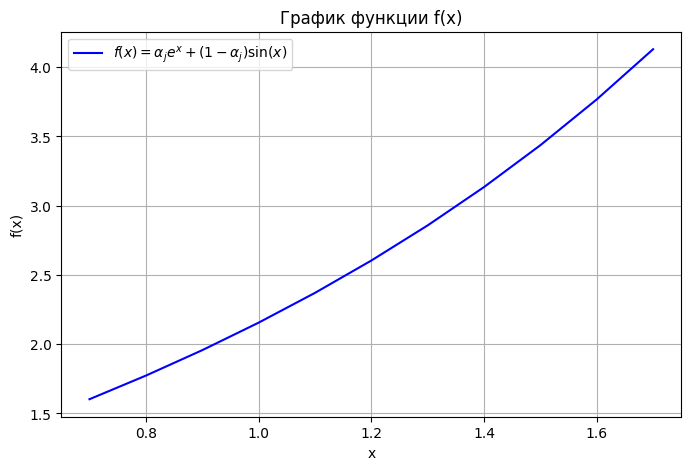

In [263]:
import matplotlib.pyplot as plt

# Интервал для графика
x_plot = x_vals #np.linspace(0.7, 1.7, 500)
y_plot = [f(x_) for x_ in x_plot]

# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label=r'$f(x) = \alpha_j e^x + (1 - \alpha_j) \sin(x)$', color='blue')
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()